## Evaluating Reasoning Module

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from tim_reasoning import utils
from pretty_confusion_matrix import pp_matrix_from_data

RESULTS_PATH = '/Users/rlopez/PTG/tim-reasoning/scripts/evaluations/resource'
RECIPE_PATH = '/Users/rlopez/PTG/tim-reasoning/tim_reasoning/resource/mit_recipes'

INFO:pytorch_transformers.modeling_bert:Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .
INFO:pytorch_transformers.modeling_xlnet:Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .


In [2]:
recipe_id = 'coffee'

with open(join(RECIPE_PATH, f'recipe_{recipe_id}.json')) as fin:
    recipe_steps = {f'Step {i}': v for i, v in enumerate (json.load(fin)['instructions'], 1)}

In [3]:
matrix_data = utils.create_matrix(recipe_id)
matrix = matrix_data['matrix']
indexes = matrix_data['indexes']

#### Matrix of Probabilities for Actions-Steps Pairs

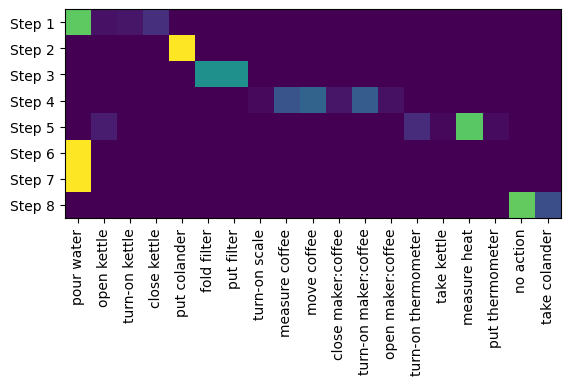

In [4]:
plt.imshow(matrix)
step_labels = {f'Step {i+1}':i for i in range(matrix.shape[0])}
plt.yticks(list(step_labels.values()), labels=step_labels.keys())
plt.xticks(list(indexes.values()), labels=indexes.keys(), rotation=90)
plt.show()

#### Recipe Steps

In [5]:
for i, s in recipe_steps.items():
    print(i, s)

Step 1 Measure 12 ounces of cold water and transfer to a kettle.
Step 2 Assemble the filter cone.  Place the dripper on top of a coffee mug.
Step 3 Prepare the filter insert by folding the paper filter in half to create a semi-circle, and in half again to create a quarter-circle. Place the paper filter in the dripper and spread open to create a cone.
Step 4 Weigh the coffee beans and grind until the coffee grounds are the consistency of coarse sand, about 20 seconds. Transfer the grounds to the filter cone.
Step 5 Check the temperature of the water.
Step 6 Pour a small amount of water in the filter to wet the grounds. Wait about 30 seconds.
Step 7 Slowly pour the rest of the water over the grounds in a circular motion. Do not overfill beyond the top of the paper filter.
Step 8 Let the coffee drain completely into the mug before removing the dripper. Discard the paper filter and coffee grounds.


#### Prediction vs True

In [11]:
video_id = 'coffee-test-1'
results = pd.read_csv(join(RESULTS_PATH, f'results_{recipe_id}.csv'))
results = results[results['video'] != video_id]

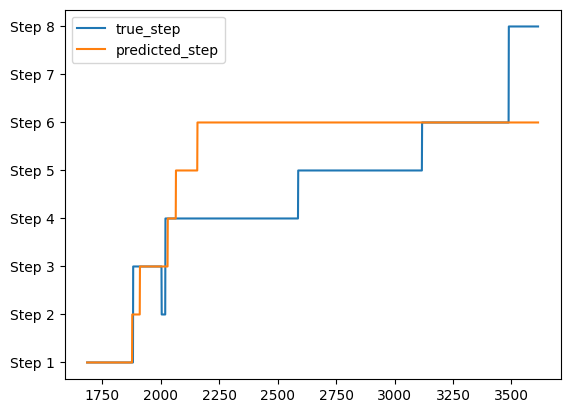

In [12]:
axes = results.plot()
axes.set_yticks([i+1 for i in step_labels.values()], labels=step_labels.keys())
axes;

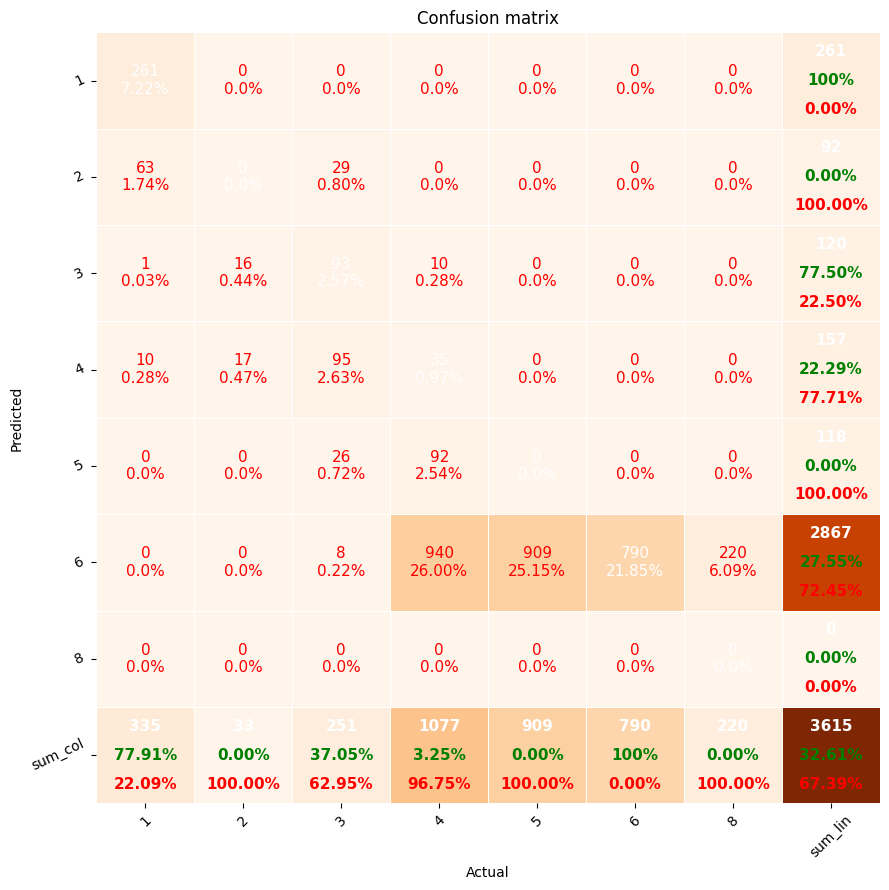

In [8]:
pp_matrix_from_data(results['true_step'], results['predicted_step'],columns=results['true_step'].unique().tolist())

In [9]:
counts = results['predicted_step'].eq(results['true_step']).value_counts().rename({True:'match', False: 'no match'})
total_accuray = counts['match']/len(results)
total_accuray

0.3261410788381743

In [10]:
results['match'] = results['predicted_step'].eq(results['true_step'])
dfa = results.groupby('true_step')['match'].mean().round(2)
dfa

true_step
1    0.78
2    0.00
3    0.37
4    0.03
5    0.00
6    1.00
8    0.00
Name: match, dtype: float64